# Importing all the required libraries

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import math

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [2]:
## Creating a function to imbalance the dataset and for general prediction as well as F1 score

def imbalancing(df,target_variable,percentage):
  df = df.sort_values(target_variable, axis=0,ascending=True)
  x, y = df[target_variable].value_counts(ascending=True)
  n = x * 100 / percentage
  return df.head(math.floor(n))

def baseline_prediction(data, target_variable):
  x = data.drop(labels= target_variable, axis=1)
  y = data[target_variable]

  classifier_baseline1 = DecisionTreeClassifier()
  baseline_scores1 = cross_val_score(classifier_baseline1, x, y, cv=10, scoring = 'f1')
  print("Decision Tree f1 score: %0.3f +/- %0.3f" % (baseline_scores1.mean(), baseline_scores1.std()))
  classifier_baseline2 = KNeighborsClassifier()
  baseline_scores2= cross_val_score(classifier_baseline2, x, y, cv=10, scoring = 'f1')
  print("KNN f1 score: %0.3f +/- %0.3f" % (baseline_scores2.mean(), baseline_scores2.std()))
  classifier_baseline3= GaussianNB()
  baseline_scores3= cross_val_score(classifier_baseline3, x, y, cv=10, scoring = 'f1')
  print("NB f1 score: %0.3f +/- %0.3f" % (baseline_scores3.mean(), baseline_scores3.std()))
  

In [3]:
## Creating a class that consists of functions for visualizations 
class imbalance_dataset():
  def __init__(self, dataset):
    self.d = dataset
  
  # Plotting histogram
  def hist(self, width=20, height=7):
    _ = self.d.hist(bins=50, figsize=(width,height))
  # Plotting heat map with correlation
  def heatmap(self, width=20, height=8):
    correlations = self.d.corr()
    f, ax = plt.subplots(figsize=(width, height))
    ax = sns.heatmap(correlations, annot=True, center=0,  cmap="BuPu")
  # Plot box plot
  def box(self, width=20, height=8):
    f, ax = plt.subplots(figsize=(width, height))
    column = list(self.d.columns)
    ax = self.d.boxplot(column= column)

  def replace(self, label):
    self.d.replace(label, inplace=True)

## Diabetes datasets

In [4]:
df1=pd.read_csv("diabetes.csv") 
df1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [5]:
# Splitting the dataset into training and testing 
X=df1.iloc[:,1:22] 
y=df1.iloc[:,0]
df1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [7]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

## KNN prediction for balanced diabetes dataset

All KNN scores: 
{'fit_time': array([0.01280499, 0.0010004 , 0.        , 0.0124557 , 0.0083344 ,
       0.00852585, 0.00808764, 0.        , 0.01562142, 0.01576734]), 'score_time': array([0.6707418 , 0.78417206, 0.78754377, 0.8110168 , 0.85694027,
       0.80910802, 0.78137469, 0.72599697, 0.71270156, 0.7408154 ]), 'test_score': array([0.67397454, 0.68387553, 0.69094767, 0.70155587, 0.72842999,
       0.7241867 , 0.69448373, 0.67821782, 0.71499293, 0.71549894])}
Accuracy mean is: 0.7006163719192665
              precision    recall  f1-score   support

         0.0       0.71      0.68      0.69      7066
         1.0       0.69      0.72      0.71      7073

    accuracy                           0.70     14139
   macro avg       0.70      0.70      0.70     14139
weighted avg       0.70      0.70      0.70     14139



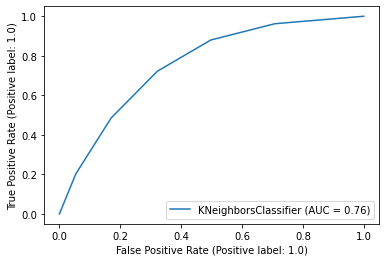

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

old_knn_scores =cross_validate(knn_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=knn_clf.predict(X_test)
#Result
print("All KNN scores: ")
print(old_knn_scores)
print("Accuracy mean is:", old_knn_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(knn_clf, X_test, y_test.values.ravel())
plt.show() 

## Decision Tree prediction for balanced diabetes dataset

All DT scores: 
{'fit_time': array([0.01267362, 0.        , 0.00202656, 0.01550674, 0.01656723,
       0.02039695, 0.00599289, 0.01409531, 0.0099194 , 0.0176692 ]), 'score_time': array([0.        , 0.01682711, 0.        , 0.        , 0.        ,
       0.00592494, 0.00800228, 0.00202751, 0.        , 0.00237584]), 'test_score': array([0.70155587, 0.70792079, 0.69943423, 0.68458274, 0.67043847,
       0.70579915, 0.67326733, 0.70509194, 0.68599717, 0.70700637])}
Accuracy mean is: 0.6941094063910487
              precision    recall  f1-score   support

         0.0       0.66      0.79      0.72      7054
         1.0       0.74      0.60      0.66      7085

    accuracy                           0.69     14139
   macro avg       0.70      0.69      0.69     14139
weighted avg       0.70      0.69      0.69     14139



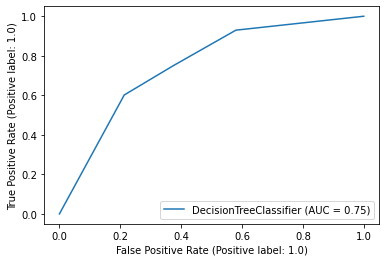

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

dt_clf.fit(X_train, y_train)

old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

## Naive Bayes prediction for balanced diabetes dataset

All NB scores: 
{'fit_time': array([0.01210809, 0.01796651, 0.01152587, 0.01869345, 0.01373243,
       0.01535749, 0.00805211, 0.01150894, 0.00904417, 0.01651621]), 'score_time': array([0.        , 0.00102711, 0.        , 0.        , 0.00202775,
       0.00099993, 0.0077107 , 0.00320029, 0.00670481, 0.00374007]), 'test_score': array([0.71287129, 0.72630835, 0.71711457, 0.72842999, 0.70933522,
       0.72842999, 0.72277228, 0.70862801, 0.72984441, 0.7133758 ])}
Accuracy mean is: 0.7197109883872828
              precision    recall  f1-score   support

         0.0       0.72      0.73      0.73      7059
         1.0       0.73      0.71      0.72      7080

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



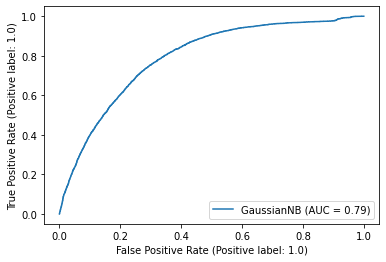

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NB_clf =  GaussianNB()

NB_clf.fit(X_train, y_train)

old_NB_scores =cross_validate(NB_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=NB_clf.predict(X_test)
#Result
print("All NB scores: ")
print(old_NB_scores)
print("Accuracy mean is:", old_NB_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(NB_clf, X_test, y_test.values.ravel())
plt.show()

## Imbalanced Diabetes Dataset

In [11]:
df1=imbalance_dataset(df1) # making the dataset imbalanced

In [12]:
df1.d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [13]:
df1.d.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


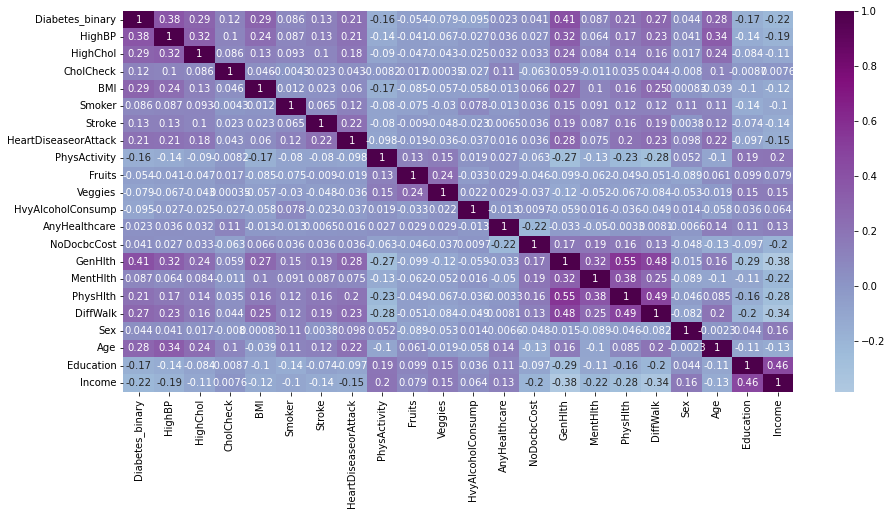

In [14]:
df1.heatmap(15,7)

In [15]:
df1.d['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [16]:
df1_low = imbalancing(df1.d,'Diabetes_binary',65) #65% of one class
df1_low['Diabetes_binary'].value_counts()

0.0    35346
1.0    19032
Name: Diabetes_binary, dtype: int64

In [17]:
df1_medium = imbalancing(df1.d,'Diabetes_binary',75)# 75% of one class
df1_medium['Diabetes_binary'].value_counts()

0.0    35346
1.0    11782
Name: Diabetes_binary, dtype: int64

In [18]:
df1_high = imbalancing(df1.d,'Diabetes_binary',90) #90% of one class
df1_high['Diabetes_binary'].value_counts()

0.0    35346
1.0     3927
Name: Diabetes_binary, dtype: int64

In [19]:
baseline_prediction(df1_low,'Diabetes_binary') # F1 score for low imbalance

Decision Tree f1 score: 0.534 +/- 0.011
KNN f1 score: 0.575 +/- 0.010
NB f1 score: 0.630 +/- 0.018


In [20]:
baseline_prediction(df1_medium,'Diabetes_binary') # F1 score for medium imbalance

Decision Tree f1 score: 0.445 +/- 0.016
KNN f1 score: 0.450 +/- 0.014
NB f1 score: 0.546 +/- 0.017


In [21]:
baseline_prediction(df1_high,'Diabetes_binary') # F1 score for high imbalance

Decision Tree f1 score: 0.254 +/- 0.017
KNN f1 score: 0.165 +/- 0.028
NB f1 score: 0.354 +/- 0.017


## 65% of one class imbalanced diabetes dataset

In [22]:
X_low=df1_low.iloc[:,1:22]
y_low=df1_low.iloc[:,0]

In [23]:
X_low

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
23573,1.0,1.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,5.0,5.0,6.0
23572,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,0.0,0.0,12.0,5.0,3.0
23571,0.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
23570,1.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,10.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40234,1.0,1.0,1.0,20.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,9.0,4.0,3.0
40233,1.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,2.0,0.0,0.0,0.0,13.0,5.0,4.0
40232,1.0,1.0,1.0,33.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,6.0,0.0,1.0,1.0,10.0,4.0,4.0
40231,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,6.0,6.0,8.0


In [24]:
y_low

0        0.0
23573    0.0
23572    0.0
23571    0.0
23570    0.0
        ... 
40234    1.0
40233    1.0
40232    1.0
40231    1.0
40230    1.0
Name: Diabetes_binary, Length: 54378, dtype: float64

## KNN prediction 

All KNN scores: 
{'fit_time': array([0.01480198, 0.01562262, 0.        , 0.01375842, 0.00753188,
       0.00817108, 0.00947714, 0.00704074, 0.01562214, 0.01120353]), 'score_time': array([0.46721125, 0.47288728, 0.51831698, 0.54635978, 0.50038457,
       0.4931457 , 0.50398731, 0.47462606, 0.52109051, 0.50720048]), 'test_score': array([0.72150735, 0.72058824, 0.72150735, 0.70680147, 0.70588235,
       0.71139706, 0.69825207, 0.71205152, 0.72769089, 0.71205152])}
Accuracy mean is: 0.7137729821689485
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      7088
         1.0       0.60      0.56      0.58      3788

    accuracy                           0.72     10876
   macro avg       0.69      0.68      0.68     10876
weighted avg       0.71      0.72      0.71     10876



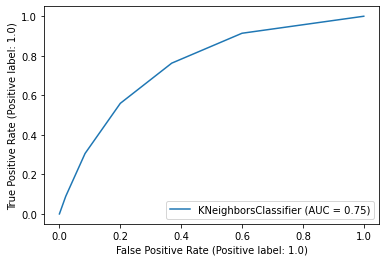

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.2)

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

old_knn_scores =cross_validate(knn_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=knn_clf.predict(X_test)
#Result
print("All KNN scores: ")
print(old_knn_scores)
print("Accuracy mean is:", old_knn_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(knn_clf, X_test, y_test.values.ravel())
plt.show() 

## Decision Tree prediction 

All DT scores: 
{'fit_time': array([0.01668835, 0.01669097, 0.01666617, 0.0343082 , 0.02289295,
       0.02612829, 0.0138948 , 0.0170753 , 0.02259922, 0.01859832]), 'score_time': array([0.01557112, 0.        , 0.        , 0.        , 0.        ,
       0.00279164, 0.00872183, 0.00738311, 0.00332785, 0.        ]), 'test_score': array([0.70404412, 0.70955882, 0.72977941, 0.74632353, 0.74356618,
       0.72242647, 0.72769089, 0.73965041, 0.70101196, 0.69365225])}
Accuracy mean is: 0.7217704049190974
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      7008
         1.0       0.61      0.61      0.61      3868

    accuracy                           0.72     10876
   macro avg       0.70      0.70      0.70     10876
weighted avg       0.72      0.72      0.72     10876



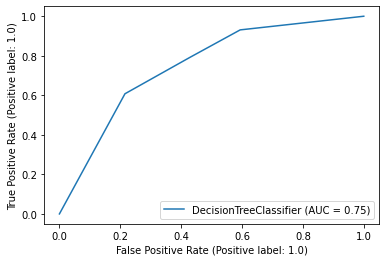

In [26]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.2)

dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

dt_clf.fit(X_train, y_train)

old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

## Naive Bayes

All NB scores: 
{'fit_time': array([0.02093005, 0.020262  , 0.0171206 , 0.02092433, 0.01842022,
       0.01465511, 0.02622843, 0.02339196, 0.02415943, 0.02074385]), 'score_time': array([0.00827432, 0.00103235, 0.01021361, 0.0019927 , 0.00873995,
       0.00813484, 0.00583625, 0.00362825, 0.00907326, 0.00894737]), 'test_score': array([0.75183824, 0.74724265, 0.72242647, 0.70588235, 0.70955882,
       0.72610294, 0.72125115, 0.73229071, 0.72769089, 0.70285189])}
Accuracy mean is: 0.724713610720277
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78      7076
         1.0       0.60      0.67      0.63      3800

    accuracy                           0.73     10876
   macro avg       0.70      0.71      0.71     10876
weighted avg       0.74      0.73      0.73     10876



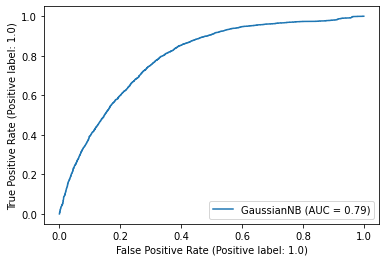

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.2)

NB_clf =  GaussianNB()

NB_clf.fit(X_train, y_train)

old_NB_scores =cross_validate(NB_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=NB_clf.predict(X_test)
#Result
print("All NB scores: ")
print(old_NB_scores)
print("Accuracy mean is:", old_NB_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(NB_clf, X_test, y_test.values.ravel())
plt.show()

## 75% of one class imbalanced diabetes dataset

In [28]:
X_medium=df1_medium.iloc[:,1:22]
y_medium=df1_medium.iloc[:,0]

## KNN

All KNN scores: 
{'fit_time': array([0.00719881, 0.        , 0.00729275, 0.        , 0.00773454,
       0.00526571, 0.01576209, 0.01276588, 0.00741959, 0.00330186]), 'score_time': array([0.42931867, 0.30810785, 0.39647079, 0.43627334, 0.40291381,
       0.33921361, 0.37985635, 0.37807083, 0.37793446, 0.34250784]), 'test_score': array([0.72852598, 0.76882291, 0.76246023, 0.74973489, 0.74549311,
       0.76139979, 0.74734607, 0.78343949, 0.74734607, 0.76220807])}
Accuracy mean is: 0.7556776606259554
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85      7083
         1.0       0.51      0.38      0.43      2343

    accuracy                           0.76      9426
   macro avg       0.66      0.63      0.64      9426
weighted avg       0.74      0.76      0.74      9426



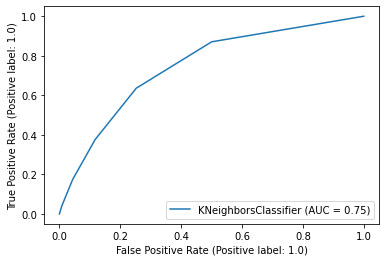

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=0.2)

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

old_knn_scores =cross_validate(knn_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=knn_clf.predict(X_test)
#Result
print("All KNN scores: ")
print(old_knn_scores)
print("Accuracy mean is:", old_knn_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(knn_clf, X_test, y_test.values.ravel())
plt.show() 

## Decision Tree

All DT scores: 
{'fit_time': array([0.01563239, 0.01637769, 0.01561403, 0.01929593, 0.01690197,
       0.01621771, 0.01745224, 0.01659966, 0.03232527, 0.01666474]), 'score_time': array([0.01693034, 0.        , 0.00814128, 0.00486588, 0.00303602,
       0.        , 0.00595903, 0.        , 0.        , 0.        ]), 'test_score': array([0.75609756, 0.75609756, 0.75609756, 0.75609756, 0.75503712,
       0.75503712, 0.75583864, 0.75583864, 0.75583864, 0.75583864])}
Accuracy mean is: 0.7557819039835372
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      7124
         1.0       0.00      0.00      0.00      2302

    accuracy                           0.76      9426
   macro avg       0.38      0.50      0.43      9426
weighted avg       0.57      0.76      0.65      9426



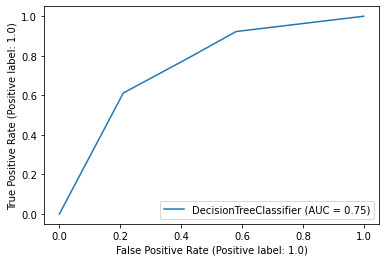

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=0.2)

dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

dt_clf.fit(X_train, y_train)

old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

## Naive Bayes

All NB scores: 
{'fit_time': array([0.0229888 , 0.01430297, 0.01561093, 0.01664901, 0.01657271,
       0.0157938 , 0.01651144, 0.01760769, 0.01668572, 0.01570153]), 'score_time': array([0.00430536, 0.00099683, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ]), 'test_score': array([0.74443266, 0.74973489, 0.75503712, 0.74337222, 0.73382821,
       0.72958643, 0.73991507, 0.74203822, 0.72186837, 0.75690021])}
Accuracy mean is: 0.7416713384802083
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82      7028
         1.0       0.49      0.63      0.55      2398

    accuracy                           0.74      9426
   macro avg       0.68      0.70      0.69      9426
weighted avg       0.77      0.74      0.75      9426



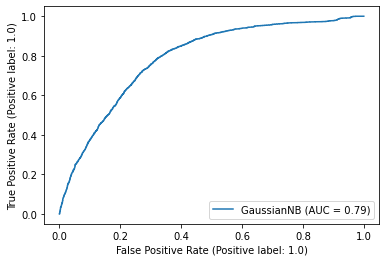

In [31]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=0.2)

NB_clf =  GaussianNB()

NB_clf.fit(X_train, y_train)

old_NB_scores =cross_validate(NB_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=NB_clf.predict(X_test)
#Result
print("All NB scores: ")
print(old_NB_scores)
print("Accuracy mean is:", old_NB_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(NB_clf, X_test, y_test.values.ravel())
plt.show()

## 90% of one class imbalanced heart disease dataset

In [32]:
X_high=df1_high.iloc[:,1:22]
y_high=df1_high.iloc[:,0]

## KNN Prediction

All KNN scores: 
{'fit_time': array([0.00881696, 0.01377249, 0.00890565, 0.00689793, 0.00748539,
       0.01226926, 0.00966382, 0.00777459, 0.00804567, 0.        ]), 'score_time': array([0.32612133, 0.30063677, 0.28396249, 0.29221606, 0.35254049,
       0.27838922, 0.28137946, 0.28397489, 0.29100895, 0.28272462]), 'test_score': array([0.89185751, 0.8956743 , 0.8778626 , 0.89694656, 0.88040712,
       0.88917197, 0.88789809, 0.89171975, 0.88280255, 0.88407643])}
Accuracy mean is: 0.887841688141197
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      7107
         1.0       0.28      0.11      0.16       748

    accuracy                           0.89      7855
   macro avg       0.59      0.54      0.55      7855
weighted avg       0.85      0.89      0.87      7855



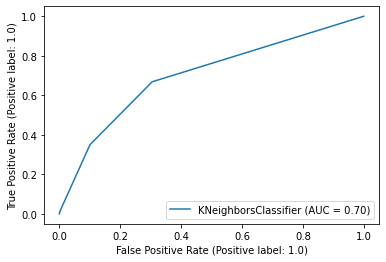

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.2)

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

old_knn_scores =cross_validate(knn_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=knn_clf.predict(X_test)
#Result
print("All KNN scores: ")
print(old_knn_scores)
print("Accuracy mean is:", old_knn_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(knn_clf, X_test, y_test.values.ravel())
plt.show() 

## Decision Tree

All DT scores: 
{'fit_time': array([0.01729035, 0.01296139, 0.01925945, 0.02303076, 0.01747632,
       0.0225637 , 0.02017808, 0.01419806, 0.01797891, 0.01541424]), 'score_time': array([0.0028882 , 0.        , 0.        , 0.0045073 , 0.        ,
       0.00889039, 0.00510621, 0.00916576, 0.        , 0.00627613]), 'test_score': array([0.8956743 , 0.89694656, 0.89694656, 0.89694656, 0.89694656,
       0.89681529, 0.89681529, 0.89681529, 0.89681529, 0.89681529])}
Accuracy mean is: 0.8967536992917455
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      7044
         1.0       0.00      0.00      0.00       811

    accuracy                           0.90      7855
   macro avg       0.45      0.50      0.47      7855
weighted avg       0.80      0.90      0.85      7855



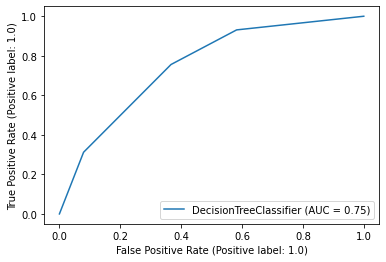

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.2)

dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

dt_clf.fit(X_train, y_train)

old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

## Naive Bayes

All NB scores: 
{'fit_time': array([0.04372072, 0.02892637, 0.025352  , 0.0235877 , 0.01232171,
       0.01577377, 0.01561761, 0.01562214, 0.01672268, 0.01567698]), 'score_time': array([0.01150775, 0.00736213, 0.00517654, 0.00792122, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01036572]), 'test_score': array([0.79262087, 0.78625954, 0.79007634, 0.80279898, 0.78753181,
       0.80764331, 0.78598726, 0.79745223, 0.77070064, 0.78726115])}
Accuracy mean is: 0.7908332117793877
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88      7048
         1.0       0.26      0.53      0.35       807

    accuracy                           0.80      7855
   macro avg       0.60      0.68      0.62      7855
weighted avg       0.87      0.80      0.83      7855



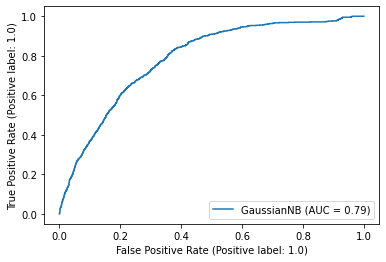

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.2)

NB_clf =  GaussianNB()

NB_clf.fit(X_train, y_train)

old_NB_scores =cross_validate(NB_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=NB_clf.predict(X_test)
#Result
print("All NB scores: ")
print(old_NB_scores)
print("Accuracy mean is:", old_NB_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(NB_clf, X_test, y_test.values.ravel())
plt.show()

## Heart disease dataset

In [36]:
df2=pd.read_csv('heart.csv')
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [38]:
X=df2.iloc[:,0:13]
y=df2.iloc[:,13]
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [39]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [40]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

## KNN Prediction

All KNN scores: 
{'fit_time': array([0.00415421, 0.00103164, 0.00533319, 0.00858808, 0.00569606,
       0.0049541 , 0.00477934, 0.        , 0.00836396, 0.        ]), 'score_time': array([0.00820565, 0.01306534, 0.00424314, 0.00686431, 0.00567055,
       0.00595188, 0.00517845, 0.00718641, 0.00551963, 0.00942421]), 'test_score': array([0.66666667, 0.66666667, 0.66666667, 0.71428571, 0.9047619 ,
       0.65      , 0.5       , 0.75      , 0.7       , 0.65      ])}
Accuracy mean is: 0.6869047619047619
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        88
           1       0.84      0.78      0.81       117

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



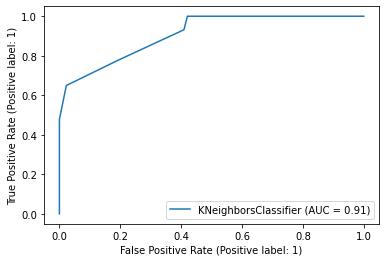

In [41]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

old_knn_scores =cross_validate(knn_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=knn_clf.predict(X_test)
#Result
print("All KNN scores: ")
print(old_knn_scores)
print("Accuracy mean is:", old_knn_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(knn_clf, X_test, y_test.values.ravel())
plt.show() 

## Decision Tree prediction for balanced heart disease dataset

All DT scores: 
{'fit_time': array([0.00600386, 0.00202799, 0.        , 0.00788522, 0.00467849,
       0.01114774, 0.        , 0.00711775, 0.00643206, 0.00737953]), 'score_time': array([0.00568438, 0.00628924, 0.00661588, 0.00199413, 0.        ,
       0.00403261, 0.00840282, 0.        , 0.00934935, 0.        ]), 'test_score': array([0.66666667, 0.61904762, 0.61904762, 0.71428571, 0.71428571,
       0.75      , 0.55      , 0.35      , 0.6       , 0.65      ])}
Accuracy mean is: 0.6233333333333333
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       103
           1       0.75      0.67      0.70       102

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205



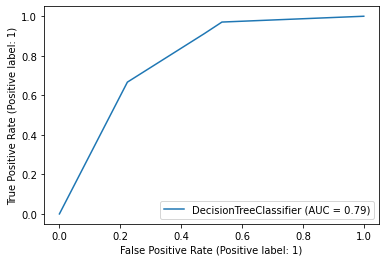

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

dt_clf.fit(X_train, y_train)

old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

## Naive Bayes prediction for heart disease dataset

All NB scores: 
{'fit_time': array([0.00825715, 0.00703979, 0.00484753, 0.        , 0.        ,
       0.        , 0.00597286, 0.        , 0.        , 0.        ]), 'score_time': array([0.00103164, 0.00787306, 0.00100136, 0.00811362, 0.01053643,
       0.0081346 , 0.0010376 , 0.0095942 , 0.00586009, 0.        ]), 'test_score': array([0.71428571, 0.80952381, 0.9047619 , 0.71428571, 0.66666667,
       0.8       , 0.85      , 0.85      , 0.8       , 0.75      ])}
Accuracy mean is: 0.785952380952381
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       107
           1       0.78      0.84      0.81        98

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



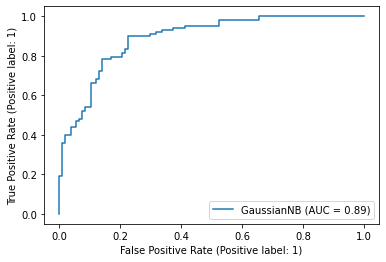

In [43]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

NB_clf =  GaussianNB()

NB_clf.fit(X_train, y_train)

old_NB_scores =cross_validate(NB_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=NB_clf.predict(X_test)
#Result
print("All NB scores: ")
print(old_NB_scores)
print("Accuracy mean is:", old_NB_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(NB_clf, X_test, y_test.values.ravel())
plt.show()

## Imbalanced Heart Disease Dataset

In [44]:
df2=imbalance_dataset(df2)

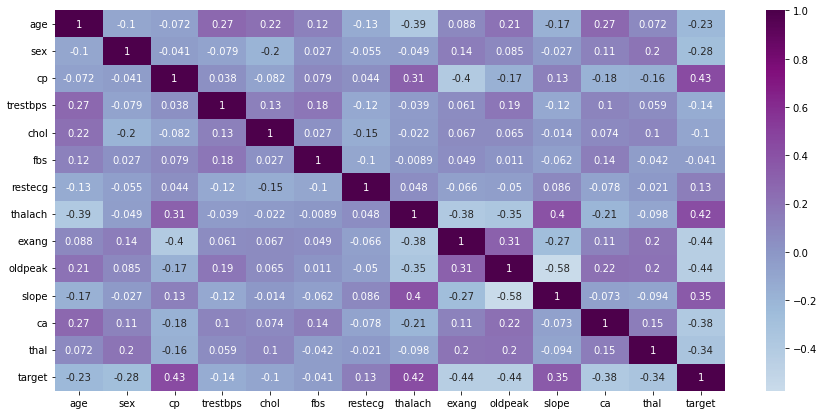

In [45]:
df2.heatmap(15,7)

In [46]:
df2.d['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [47]:
df2_low = imbalancing(df2.d,'target',65)
df2_low['target'].value_counts()

0    499
1    268
Name: target, dtype: int64

In [48]:
df2_medium = imbalancing(df2.d,'target',75)
df2_medium['target'].value_counts()

0    499
1    166
Name: target, dtype: int64

In [49]:
df2_high = imbalancing(df2.d,'target',90)
df2_high['target'].value_counts()

0    499
1     55
Name: target, dtype: int64

In [50]:
df2.d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [51]:
baseline_prediction(df2_low,'target')

Decision Tree f1 score: 0.963 +/- 0.024
KNN f1 score: 0.603 +/- 0.075
NB f1 score: 0.762 +/- 0.047


In [52]:
baseline_prediction(df2_medium,'target')

Decision Tree f1 score: 0.913 +/- 0.040
KNN f1 score: 0.407 +/- 0.100
NB f1 score: 0.677 +/- 0.083


In [53]:
baseline_prediction(df2_high,'target')

Decision Tree f1 score: 0.836 +/- 0.094
KNN f1 score: 0.065 +/- 0.131
NB f1 score: 0.563 +/- 0.152


## 65% of one class imbalanced heart disease dataset

In [54]:
X_low=df2_low.iloc[:,0:13]
y_low=df2_low.iloc[:,13]

All KNN scores: 
{'fit_time': array([0.00476909, 0.00463772, 0.00260663, 0.00528002, 0.00291586,
       0.00593424, 0.00835872, 0.00470614, 0.00425005, 0.00499988]), 'score_time': array([0.00776792, 0.00539374, 0.00687528, 0.00102854, 0.00626755,
       0.0022552 , 0.00633812, 0.00547671, 0.00530195, 0.0024991 ]), 'test_score': array([0.75      , 0.8125    , 0.8125    , 0.75      , 0.86666667,
       0.66666667, 0.6       , 0.73333333, 0.73333333, 0.66666667])}
Accuracy mean is: 0.7391666666666666
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        96
           1       0.74      0.53      0.62        58

    accuracy                           0.75       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.75      0.74       154



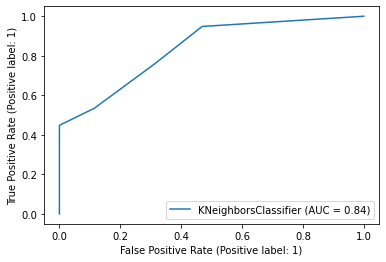

In [55]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.2)

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

old_knn_scores =cross_validate(knn_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=knn_clf.predict(X_test)
#Result
print("All KNN scores: ")
print(old_knn_scores)
print("Accuracy mean is:", old_knn_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(knn_clf, X_test, y_test.values.ravel())
plt.show() 

All DT scores: 
{'fit_time': array([0.00691867, 0.0061729 , 0.00443292, 0.00463104, 0.00199389,
       0.00520873, 0.00467706, 0.00725889, 0.0069313 , 0.00448108]), 'score_time': array([0.0039916 , 0.00298905, 0.        , 0.00349116, 0.00588322,
       0.00335026, 0.00203419, 0.        , 0.        , 0.00412941]), 'test_score': array([0.8125    , 0.8125    , 0.875     , 0.625     , 0.66666667,
       0.86666667, 0.86666667, 0.86666667, 0.8       , 0.86666667])}
Accuracy mean is: 0.8058333333333334
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       108
           1       0.60      0.76      0.67        46

    accuracy                           0.78       154
   macro avg       0.74      0.77      0.75       154
weighted avg       0.80      0.78      0.79       154



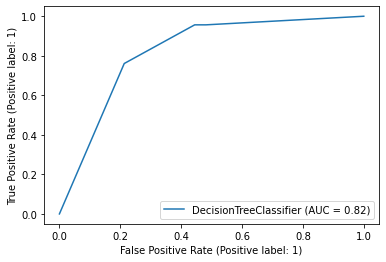

In [56]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.2)

dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

dt_clf.fit(X_train, y_train)

old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

All NB scores: 
{'fit_time': array([0.0049684 , 0.00593472, 0.00706816, 0.00769734, 0.        ,
       0.00568652, 0.0075264 , 0.00514483, 0.00671959, 0.00660968]), 'score_time': array([0.00377154, 0.        , 0.        , 0.00474501, 0.00839543,
       0.00099516, 0.00330257, 0.00600839, 0.00099707, 0.00709438]), 'test_score': array([0.875     , 0.75      , 0.75      , 0.875     , 1.        ,
       0.73333333, 0.93333333, 0.73333333, 0.73333333, 0.66666667])}
Accuracy mean is: 0.805
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       103
           1       0.67      0.82      0.74        51

    accuracy                           0.81       154
   macro avg       0.78      0.81      0.79       154
weighted avg       0.82      0.81      0.81       154



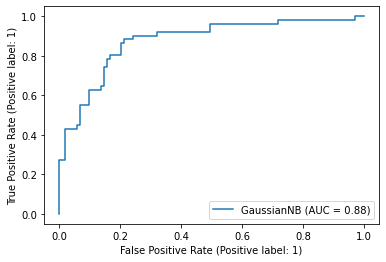

In [57]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.2)

NB_clf =  GaussianNB()

NB_clf.fit(X_train, y_train)

old_NB_scores =cross_validate(NB_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=NB_clf.predict(X_test)
#Result
print("All NB scores: ")
print(old_NB_scores)
print("Accuracy mean is:", old_NB_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(NB_clf, X_test, y_test.values.ravel())
plt.show()

## 75% of one class imbalanced heart disease dataset

In [58]:
X_medium=df2_medium.iloc[:,0:13]
y_medium=df2_medium.iloc[:,13]

All KNN scores: 
{'fit_time': array([0.00304198, 0.00202489, 0.0069983 , 0.00507331, 0.00385785,
       0.00709701, 0.00235391, 0.        , 0.00555396, 0.00703955]), 'score_time': array([0.00621796, 0.00612926, 0.00203109, 0.00805354, 0.00319529,
       0.00551581, 0.0052526 , 0.00952935, 0.        , 0.        ]), 'test_score': array([0.78571429, 0.71428571, 0.78571429, 0.76923077, 0.84615385,
       0.76923077, 0.84615385, 0.53846154, 0.84615385, 0.76923077])}
Accuracy mean is: 0.767032967032967
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        97
           1       0.56      0.28      0.37        36

    accuracy                           0.74       133
   macro avg       0.66      0.60      0.60       133
weighted avg       0.71      0.74      0.71       133



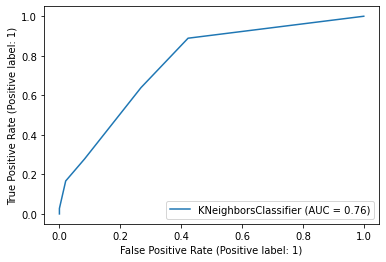

In [59]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=0.2)

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

old_knn_scores =cross_validate(knn_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=knn_clf.predict(X_test)
#Result
print("All KNN scores: ")
print(old_knn_scores)
print("Accuracy mean is:", old_knn_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(knn_clf, X_test, y_test.values.ravel())
plt.show() 

All DT scores: 
{'fit_time': array([0.00626254, 0.01013041, 0.00574565, 0.01594281, 0.00983262,
       0.        , 0.00804782, 0.        , 0.        , 0.        ]), 'score_time': array([0.00104856, 0.00535464, 0.        , 0.        , 0.00162268,
       0.00816751, 0.00244451, 0.        , 0.0159533 , 0.        ]), 'test_score': array([0.78571429, 0.78571429, 0.78571429, 0.84615385, 0.84615385,
       0.76923077, 0.84615385, 0.76923077, 0.84615385, 0.84615385])}
Accuracy mean is: 0.8126373626373626
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       104
           1       0.80      0.55      0.65        29

    accuracy                           0.87       133
   macro avg       0.84      0.76      0.79       133
weighted avg       0.87      0.87      0.86       133



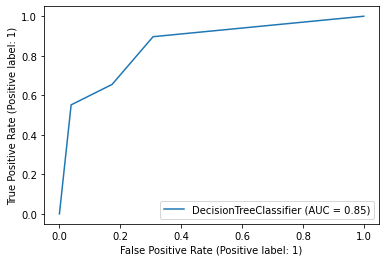

In [60]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=0.2)

dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

dt_clf.fit(X_train, y_train)

old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

All NB scores: 
{'fit_time': array([0.00498414, 0.00307631, 0.00099802, 0.00341034, 0.00805569,
       0.00099659, 0.00857687, 0.00906157, 0.00805116, 0.00820184]), 'score_time': array([0.00099945, 0.00566053, 0.00693989, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00104165]), 'test_score': array([0.85714286, 0.85714286, 0.92857143, 0.92307692, 0.84615385,
       0.76923077, 0.84615385, 0.76923077, 0.76923077, 0.84615385])}
Accuracy mean is: 0.8412087912087912
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        95
           1       0.62      0.76      0.68        38

    accuracy                           0.80       133
   macro avg       0.76      0.79      0.77       133
weighted avg       0.82      0.80      0.80       133



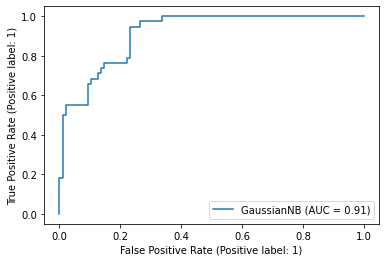

In [61]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=0.2)

NB_clf =  GaussianNB()

NB_clf.fit(X_train, y_train)

old_NB_scores =cross_validate(NB_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=NB_clf.predict(X_test)
#Result
print("All NB scores: ")
print(old_NB_scores)
print("Accuracy mean is:", old_NB_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(NB_clf, X_test, y_test.values.ravel())
plt.show()

## 90% of one class imbalanced heart disease dataset

In [62]:
X_high=df2_high.iloc[:,0:13]
y_high=df2_high.iloc[:,13]

All KNN scores: 
{'fit_time': array([0.00408101, 0.00518274, 0.00202465, 0.00103021, 0.        ,
       0.        , 0.        , 0.        , 0.01561809, 0.        ]), 'score_time': array([0.00239015, 0.00403428, 0.00099993, 0.00802875, 0.00805426,
       0.097826  , 0.01561809, 0.        , 0.        , 0.        ]), 'test_score': array([0.83333333, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
       0.90909091, 0.90909091, 0.72727273, 0.81818182, 0.81818182])}
Accuracy mean is: 0.865151515151515
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        97
           1       0.20      0.07      0.11        14

    accuracy                           0.85       111
   macro avg       0.54      0.52      0.51       111
weighted avg       0.79      0.85      0.81       111



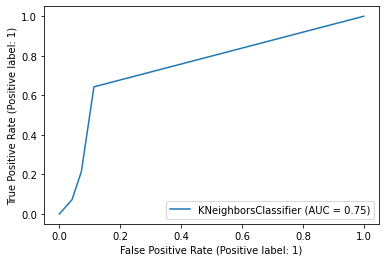

In [63]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.2)

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

old_knn_scores =cross_validate(knn_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=knn_clf.predict(X_test)
#Result
print("All KNN scores: ")
print(old_knn_scores)
print("Accuracy mean is:", old_knn_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(knn_clf, X_test, y_test.values.ravel())
plt.show() 

All DT scores: 
{'fit_time': array([0.00829339, 0.00305939, 0.00634003, 0.00807571, 0.        ,
       0.00821972, 0.        , 0.        , 0.01562333, 0.        ]), 'score_time': array([0.00366092, 0.00814843, 0.        , 0.0085535 , 0.00959373,
       0.        , 0.        , 0.        , 0.        , 0.        ]), 'test_score': array([0.91666667, 1.        , 1.        , 0.90909091, 0.90909091,
       0.81818182, 0.90909091, 0.90909091, 0.81818182, 0.81818182])}
Accuracy mean is: 0.9007575757575758
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       103
           1       0.33      0.75      0.46         8

    accuracy                           0.87       111
   macro avg       0.66      0.82      0.70       111
weighted avg       0.93      0.87      0.89       111



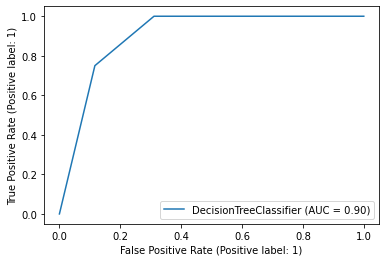

In [64]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.2)

dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

dt_clf.fit(X_train, y_train)

old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

All NB scores: 
{'fit_time': array([0.0076592 , 0.00099587, 0.        , 0.00741172, 0.00806141,
       0.        , 0.00394845, 0.00815129, 0.        , 0.01591539]), 'score_time': array([0.00449109, 0.01018262, 0.00805545, 0.        , 0.00675726,
       0.00806022, 0.        , 0.        , 0.        , 0.        ]), 'test_score': array([0.83333333, 0.72727273, 0.81818182, 0.81818182, 1.        ,
       0.90909091, 0.90909091, 1.        , 1.        , 0.90909091])}
Accuracy mean is: 0.8924242424242423
              precision    recall  f1-score   support

           0       0.98      0.88      0.92        98
           1       0.48      0.85      0.61        13

    accuracy                           0.87       111
   macro avg       0.73      0.86      0.77       111
weighted avg       0.92      0.87      0.89       111



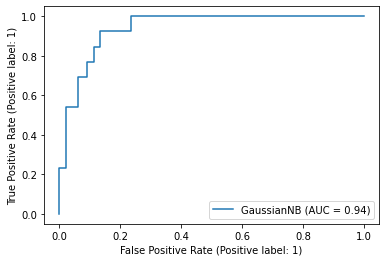

In [65]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.2)

NB_clf =  GaussianNB()

NB_clf.fit(X_train, y_train)

old_NB_scores =cross_validate(NB_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=NB_clf.predict(X_test)
#Result
print("All NB scores: ")
print(old_NB_scores)
print("Accuracy mean is:", old_NB_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(NB_clf, X_test, y_test.values.ravel())
plt.show()